# <center> Week 4 - Python : Data Transformation and Mapping <center>

## <center> Saurav Raj Khanal </center>

This week's summary;
## A. Data Transformation and Mapping
-	apply: Great for applying custom or predefined functions to a DataFrame or Series.
-	map: Ideal for one-to-one mapping in a Series using a dictionary or function.
-	replace: A handy method for replacing specific values in DataFrames.
-	astype: Essential for ensuring data types align with analysis needs.
-	pipe: Facilitates chaining multiple DataFrame operations for better readability.

## B. Data Cleaning and Manipulation
### Handling Missing Data
-	Use dropna() for removal and fillna() for imputation based on context.
-	interpolate(): intelligently predicts and fills missing values.
### Handling Duplicates
-	Methods like drop_duplicates() help clean duplicate rows in datasets.
### One-Hot Encoding
-	Simplifies categorical data representation for machine learning workflows.
### Data Normalization
-	Use scaling techniques (e.g., min-max, z-score) to ensure consistent ranges.

## C. Visualization Techniques
### Comparisons
-	Use bar and line graphs for comparisons over time or categories.
### Relationships
-	It includes Scatterplots, bubble charts, and heatmaps to illustrate correlations and interactions between variables.
### Distributions
-	It includes Histograms and box plots to help understand data spread and outliers.
### Compositions
-	It includes Pie and stacked bar charts to visualize proportions effectively.

## D. Grouping and Aggregation
-	Operations like groupby combined with aggregate functions (mean, sum, std) summarize and analyze grouped data efficiently.


### Data tranformation and mapping

- apply : allows us to use a function to each element, row, or column in a Dataframe or Series
- map: is used to map values in a Series acc to a dictionary or another series
- replace: it allows for replacing specific values in the Dataframe with new values
- astype: this is used to convert data type
- pipe : it allows chaining and using complex functions that operate on the entire dataframe. this can be used for complex transformation operation
 

In [59]:
# convert marks to scale of 1
import pandas as pd
students = pd.read_csv('data/student.csv')
students['mark_percent'] = students['mark'].apply(lambda m: m/100)
students.head()

,id,name,class,mark,gender,mark_percent
0,1,John Deo,Four,75.0,female,0.75
1,2,Max Ruin,Three,85.0,male,0.85
2,3,Arnold,Three,55.0,male,0.55
3,4,Krish Star,Four,60.0,female,0.60
4,5,John Mike,Four,60.0,female,0.60


In [60]:
# map

students['grade'] = students['class'].map({'One':1, 'Two':2, 'Three':3, "Four":4, "Five":5, "Six": 6, "Seven":7, "Eight":8, "Nine":9, "Ten":10})

students['gender_code'] = students["gender"].map({'male':1, 'female':2})

students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,John Deo,Four,75.0,female,0.75,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,60.0,female,0.60,4.0,2.0
4,5,John Mike,Four,60.0,female,0.60,4.0,2.0


In [61]:
# replace name "John Doe" with 'Jairam' (replace specific value)

students['name'] = students['name'].replace({'John Deo':'Jairam'})
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jairam,Four,75.0,female,0.75,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,60.0,female,0.60,4.0,2.0
4,5,John Mike,Four,60.0,female,0.60,4.0,2.0


### astype

In [62]:
# convert mark datatype to float
students['mark'] = students['mark'].astype(float)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jairam,Four,75.0,female,0.75,4.0,2.0
1,2,Max Ruin,Three,85.0,male,0.85,3.0,1.0
2,3,Arnold,Three,55.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,60.0,female,0.60,4.0,2.0
4,5,John Mike,Four,60.0,female,0.60,4.0,2.0


### pipe

In [63]:
# create a function that triples marks and pipes it to the pandas Dataframe

def triple_marks(df):
    df['mark'] = df['mark'] * 3
    return df

students = students.pipe(triple_marks)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code
0,1,Jairam,Four,225.0,female,0.75,4.0,2.0
1,2,Max Ruin,Three,255.0,male,0.85,3.0,1.0
2,3,Arnold,Three,165.0,male,0.55,3.0,1.0
3,4,Krish Star,Four,180.0,female,0.60,4.0,2.0
4,5,John Mike,Four,180.0,female,0.60,4.0,2.0


In [64]:
def check_result(df):

    df['mark'] = df['mark'].apply(lambda m:'Pass' if m > 40 else 'Fail')
    # return df['mark']> 40


students['result'] = students.pipe(check_result)
students.head()

,id,name,class,mark,gender,mark_percent,grade,gender_code,result
0,1,Jairam,Four,Pass,female,0.75,4.0,2.0,None
1,2,Max Ruin,Three,Pass,male,0.85,3.0,1.0,None
2,3,Arnold,Three,Pass,male,0.55,3.0,1.0,None
3,4,Krish Star,Four,Pass,female,0.60,4.0,2.0,None
4,5,John Mike,Four,Pass,female,0.60,4.0,2.0,None


## Data Cleaning and Manipulation

- Handle missing data
- Handle Duplicates
- One-Hot-Encoding
- Normalization

In [65]:
import pandas as pd

students = pd.read_csv('data/student.csv')
students.head(12)

,id,name,class,mark,gender
0,1,John Deo,Four,75.0,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male
8,9,Tes Qry,Six,78.0,NaN
9,10,Big John,Four,55.0,female


## Handling missing data

- remove rows containing missing values ``(df.dropna())``
    - ``dropna(axis=0)`` removes rows containing at least 1 missing value

- replace missing values (df.fillna())
    - replace with specific value (df.fillna(value)) fill the missing value



In [66]:
import pandas as pd
from IPython.display import display
students = pd.read_csv('data/student.csv')

display(students.head(12))
#students.dropna(axis = 0, how = 'any', inplace= True) #axis = 0 drops rows with NAN

students = students.fillna(1) # replace missing values with 1
display(students.head(12))    

students.fillna(method = 'ffill') # fills with the previous row value
students.fillna(method = 'bfill') # fills with the backward row value
students['mark'].fillna(50) # ony fill empty value of Name column
students.fillna({'mark':50,'gender':'Male'}) # replace mark with 50 if its empty and gender with

df_interpolated = students.interpolate() # interpolation predicts and fills the value
students.fillna(df_interpolated)
students['mark'].fillna(students['mark'].mean())


,id,name,class,mark,gender
0,1,John Deo,Four,75.0,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male
8,9,Tes Qry,Six,78.0,NaN
9,10,Big John,Four,55.0,female


,id,name,class,mark,gender
0,1,John Deo,Four,75.0,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male
8,9,Tes Qry,Six,78.0,1
9,10,Big John,Four,55.0,female


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2608\2818630430.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'ffill') # fills with the previous row value
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2608\2818630430.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  students.fillna(method = 'bfill') # fills with the backward row value
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2608\2818630430.py:16: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = students.interpolate() # interpolation predicts and fills the value


0     75.0
1     85.0
2     55.0
3     60.0
4     60.0
5     55.0
6     78.0
7     85.0
8     78.0
9     55.0
10    89.0
11     1.0
12    88.0
13    88.0
14    88.0
15    88.0
16    54.0
17    75.0
18    18.0
19    65.0
20    69.0
21    55.0
22    79.0
23    78.0
24    88.0
25    79.0
26    81.0
27    86.0
28    55.0
29    79.0
30    88.0
31    90.0
32    96.0
33    69.0
34    88.0
Name: mark, dtype: float64

## Data Duplicates

- Check Duplicates
- Drop Duplicates

In [67]:
duplicates = students.duplicated()
students.drop_duplicates() # drop duplicates


,id,name,class,mark,gender
0,1,John Deo,Four,75.0,female
1,2,Max Ruin,Three,85.0,male
2,3,Arnold,Three,55.0,male
3,4,Krish Star,Four,60.0,female
4,5,John Mike,Four,60.0,female
5,6,Alex John,Four,55.0,male
6,7,My John Rob,Fifth,78.0,male
7,8,Asruid,Five,85.0,male
8,9,Tes Qry,Six,78.0,1
9,10,Big John,Four,55.0,female


### One Hot Encoding

-  method for converting categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a seperate column, where a value of 1 indicates the presence of that category , and 0 indicated its absence for example we replace the country name with numerical value. e.g: America: 1

In [68]:
students = pd.read_csv('data/student.csv')

df_pandas_encoded = pd.get_dummies(students, columns = ['class'])
print(f"one hot encoded data using pandas:")
display(df_pandas_encoded.head(12))

one hot encoded data using pandas:


,id,name,mark,gender,class_Eight,class_Fifth,class_Five,class_Four,class_Nine,class_Seven,class_Six,class_Three
0,1,John Deo,75.0,female,False,False,False,True,False,False,False,False
1,2,Max Ruin,85.0,male,False,False,False,False,False,False,False,True
2,3,Arnold,55.0,male,False,False,False,False,False,False,False,True
3,4,Krish Star,60.0,female,False,False,False,True,False,False,False,False
4,5,John Mike,60.0,female,False,False,False,True,False,False,False,False
5,6,Alex John,55.0,male,False,False,False,True,False,False,False,False
6,7,My John Rob,78.0,male,False,True,False,False,False,False,False,False
7,8,Asruid,85.0,male,False,False,True,False,False,False,False,False
8,9,Tes Qry,78.0,NaN,False,False,False,False,False,False,True,False
9,10,Big John,55.0,female,False,False,False,True,False,False,False,False


## Data Normalization
- Data normalization involves adjusting measurement values of different scales to a common scale.
- only applicable to numerical columns

### 5 common normalization methods:
1. Single features scaling
2. min-max scaling
3. Z-score normalization
4. log scaling
5. Clipping

In [69]:
import pandas as pd
import numpy as np 
products = pd.read_csv('data/product-data.csv')

# single feature scaling

products['Sales_Single_Scale'] = products['Sales'] / products['Sales'].max()

#log
products['Sales_Single'] = np.log1p(products['Sales'])

#clipping
products['Discount-Clipped'] = products['Discount_Percentage'].clip(lower = 5, upper = 15)
products  

,Product_ID,Sales,Price,Customer_Rating,Discount_Percentage,Sales_Single_Scale,Sales_Single,Discount-Clipped
0,1,500,200,4.2,10,0.50,6.216606,10
1,2,700,450,3.9,15,0.70,6.552508,15
2,3,800,300,4.5,12,0.80,6.685861,12
3,4,900,350,4.8,8,0.90,6.803505,8
4,5,1000,500,4.0,5,1.00,6.908755,5
5,6,300,250,3.7,20,0.30,5.707110,15
6,7,450,275,4.3,17,0.45,6.111467,15
7,8,620,320,3.8,7,0.62,6.431331,7
8,9,750,400,4.1,6,0.75,6.621406,6
9,10,850,375,4.6,14,0.85,6.746412,14


## Grouping and aggregate

- Grouping consists of three operations
    - split 
    - Apply 
    - combine
    

### Group by


In [70]:
import numpy as np
from IPython.display import display

students = pd.read_csv('data/student.csv')

# group data based on gender 
gender_data = students.groupby('gender')
display(gender_data.count())
gender_data['mark'].mean()
# Standard deviation 

group_by_class = students.groupby('class')
display(group_by_class['mark'].mean())
 
display(group_by_class.count())
display(group_by_class['mark'].mean())
display(group_by_class['id'].count())

,id,name,class,mark
gender,,,,
female,17,17,17,16
male,17,17,17,17


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      80.666667
Three    73.666667
Name: mark, dtype: float64

,id,name,mark,gender
class,,,,
Eight,1,1,1,1
Fifth,1,1,1,1
Five,2,2,2,2
Four,9,9,9,9
Nine,2,2,2,2
Seven,10,10,10,10
Six,7,7,6,6
Three,3,3,3,3


class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     70.888889
Nine     41.500000
Seven    77.600000
Six      80.666667
Three    73.666667
Name: mark, dtype: float64

class
Eight     1
Fifth     1
Five      2
Four      9
Nine      2
Seven    10
Six       7
Three     3
Name: id, dtype: int64

## Aggregation
- count() 
- sum()
- mean()
- median()
- min()
- max()
- mode()
- std()
- var()

## Sorting
### Sort by index
### Sort by value

- Ascending 
- Descending
- Sorting by date
- sorting with key function

In [71]:
country_data_list = [
    ['Afganistan', 1952, 8425333, 'Asia'],
    ['Azerbaizan', 1234, 4728343, 'Asia'],
    ['Australia', 1957, 9712569, 'Oceania'],
    ['Brazil', 1962, 74298349,'Americas'],
]

country_data = pd.DataFrame(country_data_list, columns=['country','year','population','continent'])
new_sorted_data = country_data.sort_values(by=['country'],ascending=True)
display(new_sorted_data)

sort_by_descending = country_data.sort_values(by=['country'],ascending=False)
display(sort_by_descending)
sort_by_population = country_data.sort_values(by = ['population','country'],ascending=False)
display(sort_by_population)



,country,year,population,continent
0,Afganistan,1952,8425333,Asia
2,Australia,1957,9712569,Oceania
1,Azerbaizan,1234,4728343,Asia
3,Brazil,1962,74298349,Americas


,country,year,population,continent
3,Brazil,1962,74298349,Americas
1,Azerbaizan,1234,4728343,Asia
2,Australia,1957,9712569,Oceania
0,Afganistan,1952,8425333,Asia


,country,year,population,continent
3,Brazil,1962,74298349,Americas
2,Australia,1957,9712569,Oceania
0,Afganistan,1952,8425333,Asia
1,Azerbaizan,1234,4728343,Asia


## Sorting by date

In [72]:
import pandas as pd

data = pd.read_csv('data/student-admission.csv')

#convert to datetime
data['AdmissionDate'] = pd.to_datetime(data['AdmissionDate'])

# sort by AdmissionDate 
sorted_by_date = data.sort_values(by=['AdmissionDate','Name'],ascending=False)

sorted_by_date

,Unnamed: 0,AdmissionDate,StudentID,Name,Stream
0,0,2021-01-25,7,Ram,CSE
1,1,2021-01-22,5,Shyam,ECE
4,4,2021-01-22,6,Lucky,CSE
6,6,2021-01-21,4,Danny,EEE
2,2,2021-01-20,3,Mohan,Civil
3,3,2021-01-18,2,Sohan,Mechanical
5,5,2021-01-17,1,Abhinav,IT


## Chart Types organized by data analysis 

- comparisons : bar graph, line graph, multiple line graph, radar graph, gnatt graph
- relationship : scatterplot, bubble chart, heat map, density plot, correlation matrix
- distributions : histogram, box-plot (box and whisker plot), violin plot, frequency polygon, stem and leaf plot, cf distribution graph
- compositions : pie chart, doughnut chrt, stacked bar graph, stacked area chart, funnel chart


## Data Comparison Visualization

- Bar Chart
- Line Graph
- Multiple line Graph

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Compare GDP growth of Nepal, India and China
- Bar Chart
- Line Graph

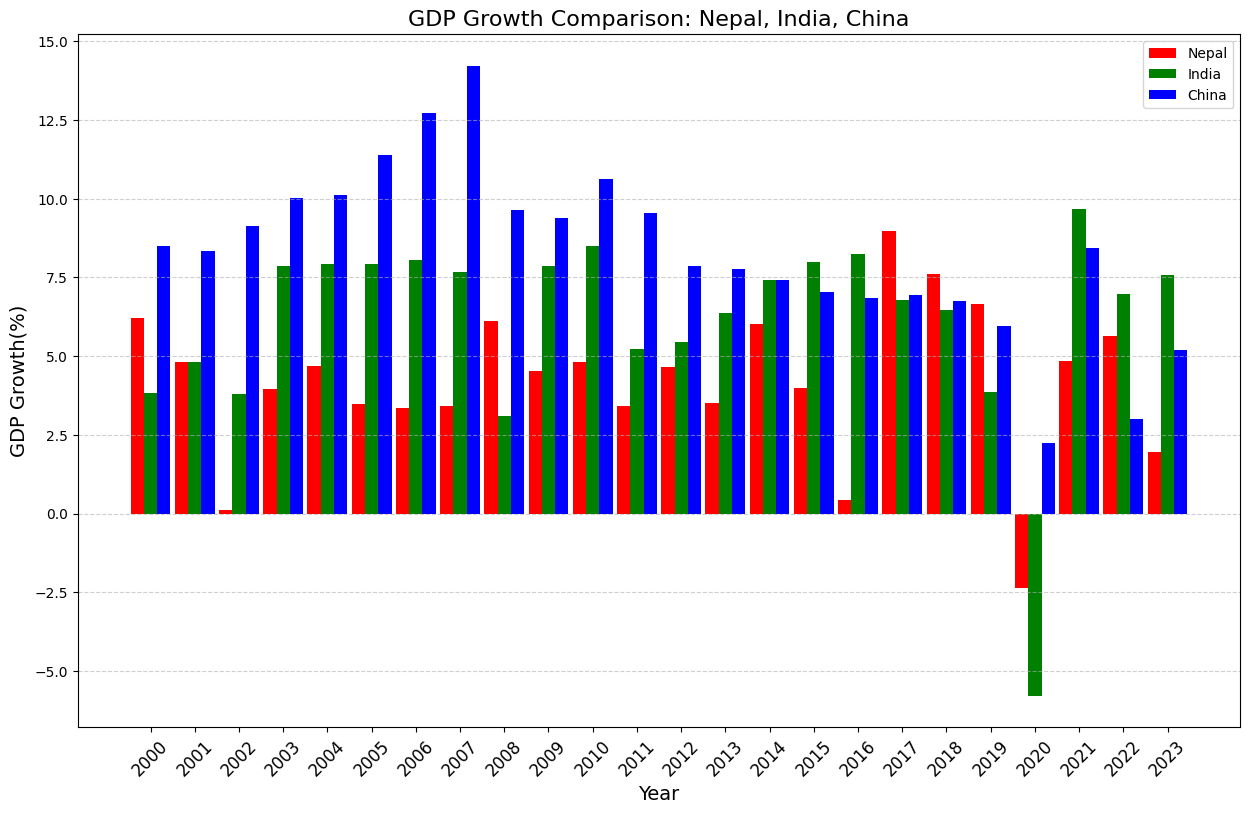

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

#set up the figure size
plt.figure(figsize=(15,9))

#Define the width of the bars
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

# Plotting the bars for Nepal India and China
plt.bar([i - width for i in x], nep_ind_china_gdp_data["Nepal"], width=width, label='Nepal', color='red')
plt.bar(x, nep_ind_china_gdp_data['India'], width=width, label='India', color='green')
plt.bar([i + width for i in x], nep_ind_china_gdp_data["China"], width=width, label='China', color='blue')

# Adding titles and labels

plt.title('GDP Growth Comparison: Nepal, India, China', fontsize = 16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth(%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12, rotation=45)
plt.legend()

#Adding grid lines for better redeability

plt.grid(axis='y',linestyle='--', alpha=0.6)

plt.show()

## Line Graph

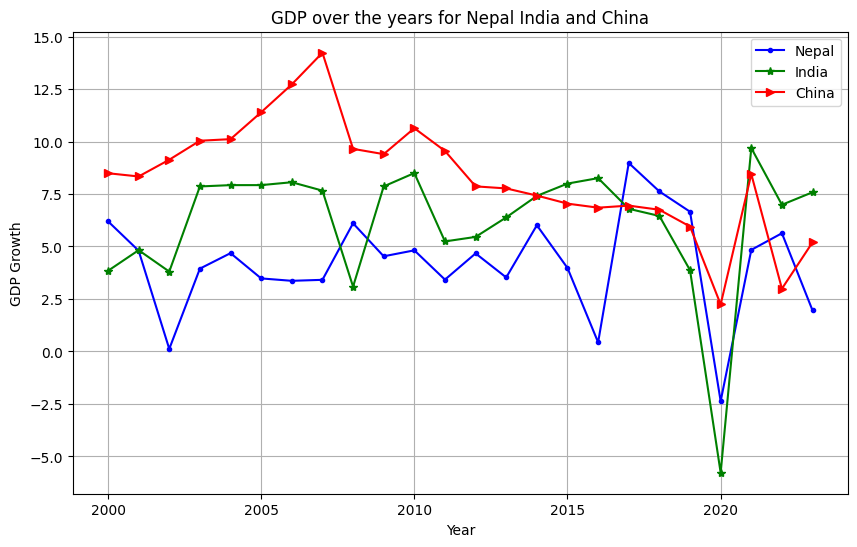

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')

# Data 
years = nep_ind_china_gdp_data['Year']
nepal_gdp = nep_ind_china_gdp_data['Nepal']
india_gdp = nep_ind_china_gdp_data['India']
china_gdp = nep_ind_china_gdp_data['China']

# Create the plot
plt.figure(figsize =(10,6))
plt.plot(years, nepal_gdp, label='Nepal', color = 'blue', marker = '.')
plt.plot(years, india_gdp, label='India', color = 'green', marker = '*')
plt.plot(years, china_gdp, label='China', color = 'red', marker = '>')

# Labelling the axes and title

plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP over the years for Nepal India and China')

# show legend
plt.legend()

#show the plot
plt.grid(True)
plt.show()

## Vizualize relationship between data

- scatter plot : relnship between changers observed between two diff sets of variable
- Bubble chart : shows reln between x(age) , y(income), and bubble size(income)
- Heat map : colors to show intensity of a variable or a relnship
- density plot: distribution of a data over a continuous interval
- correlation matrix : statistical technique used to evaluate relnship between two variables in a dataset

## Scatter Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


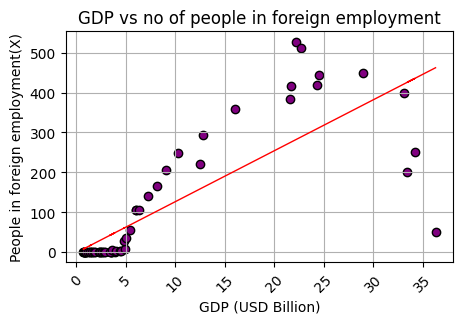

In [76]:
# Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n: n/1000)

display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor ='black'

)

## fit a linear regression model
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c= np.polyfit(x,y,1) # 1 i the degree of polynomial y = mx+c is of degree 1

# plot  the trend line
plt.plot(x, m*x+c, color='red', linewidth = 1, label = "GDP-FE-Trend-Line")

# Add titles and Labels
plt.xticks(rotation=45)
plt.title('GDP vs no of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in foreign employment(X)')
plt.grid(True)

#Display the plot
plt.show()

## Bubble Chart

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


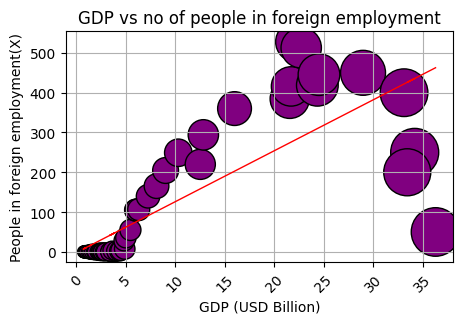

In [77]:
# Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n: n/1000)

display(nepal_economy.head())
plt.figure(figsize=(5,3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor ='black',
    s = nepal_economy['per_capita']

)

## fit a linear regression model
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c= np.polyfit(x,y,1) # 1 i the degree of polynomial y = mx+c is of degree 1

# plot  the trend line
plt.plot(x, m*x+c, color='red', linewidth = 1, label = "GDP-FE-Trend-Line")

# Add titles and Labels
plt.xticks(rotation=45)
plt.title('GDP vs no of people in foreign employment')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in foreign employment(X)')
plt.grid(True)

#Display the plot
plt.show()

## Heat Map

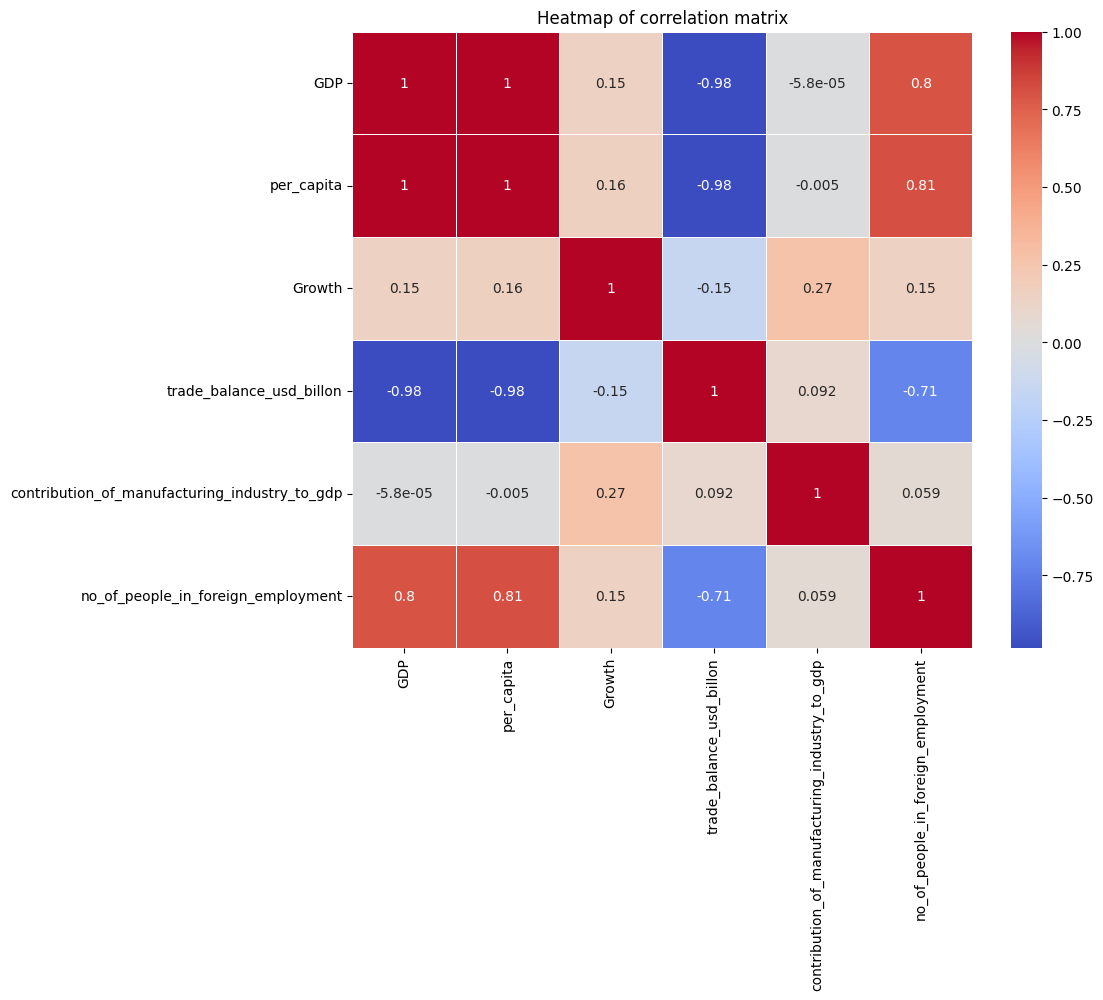

In [78]:
plt.figure(figsize=(10,8))
correlation_matrix = nepal_economy.drop(columns=['Year'],inplace = False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths = 0.5)
plt.title("Heatmap of correlation matrix")
plt.show()

## Distributions
- histogram : to describe num data to which have grouped into frequency distribution
- frequency polygon : constructed by joining the upper mid point of histogram
- cumulative frequency distribution: how may observtion lie above or below the certain values or graphical rep of frequency distribution
- box plot: five point summary( min, Q1, median, Q3, max ) and outliers

In [2]:
student_data = pd.DataFrame({
        'Marks': ['0-20','20-40','40-60','60-80','80-100'],
        'no_of_students' : [10,22,35,28,5]   
})

student_data['mid_points'] = student_data['Marks'].apply(lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2)

# Calculating the lower bounds of each minimum range
lower_bounds = student_data['Marks'].apply(lambda m: int(m.split('-')[0])).min()

# Calculating the upper bounds of each max range

student_data['upper_bounds'] = student_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()
upper_bounds = student_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()

# calculate the cumulative frequency
student_data['cumulative_frequency'] = student_data['no_of_students'].cumsum()

bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))
student_data['bins'] = pd.cut(x = student_data['no_of_students'], bins = bin_edges)

print(bin_edges)
display(student_data.head())

plt.figure(figsize=(10,5))

# use mid_points as the x-values for the histogram and the frequency y-values
plt.hist(student_data['mid_points'], bins=bin_edges, weights=student_data['no_of_students'],
         edgecolor = 'black', alpha = 0.7, label = 'Marks')

# plotting frequency distribution curve
plt.plot(student_data['mid_points'], student_data['no_of_students'], marker='o', color='red', linestyle='-', label='Frequency Curve')

# plotting cumulative frequency curve
# plt.plot(student_data['upper_bounds'], student_data['cumulative_frequency'], marker='x', linestyle='-', color='blue', label='Cumulative Frequency')

# Add labels and titles
plt.title('Histogram with Frequency Curve')
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of students')

# Display the legend
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()

NameError: name 'pd' is not defined

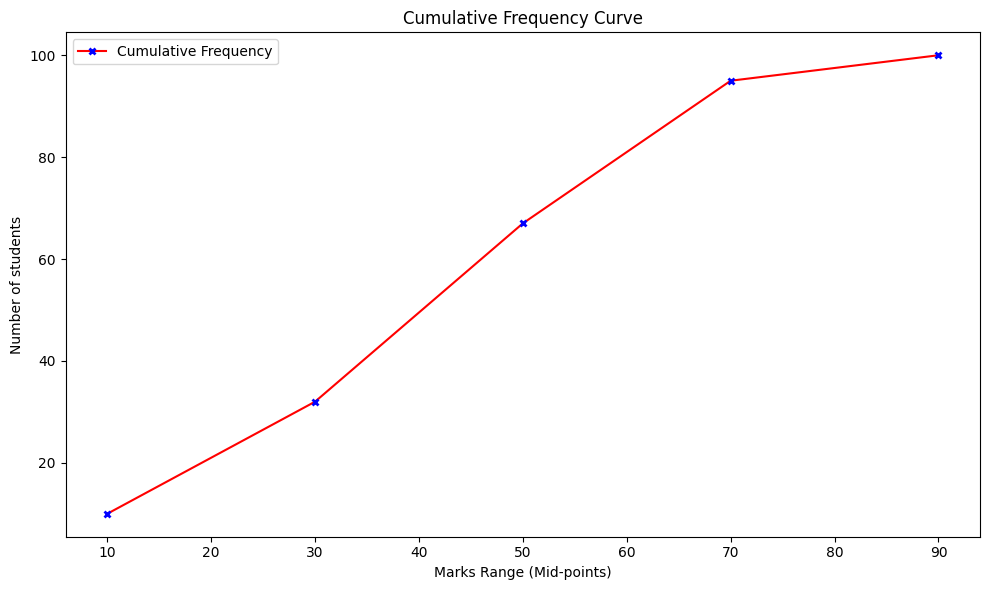

,Marks,no_of_students,mid_points,upper_bounds,cumulative_frequency,bins,cumulative frequency
0,0-20,10,10.0,100,10,"(0, 20]",10
1,20-40,22,30.0,100,32,"(20, 40]",32
2,40-60,35,50.0,100,67,"(20, 40]",67
3,60-80,28,70.0,100,95,"(20, 40]",95
4,80-100,5,90.0,100,100,"(0, 20]",100


In [80]:
plt.figure(figsize=(10,6))
# sns.distplot(x, kde=True, norm_hist=True)
cumulative_frequency = np.cumsum(student_data['no_of_students'])
student_data['cumulative frequency'] = cumulative_frequency

sns.lineplot(x = student_data['mid_points'], 
             y = student_data['cumulative frequency'], 
             color='red', marker='x', markersize = 5, markeredgewidth = 2,
             markeredgecolor = 'blue', linestyle = '-', 
             label = 'Cumulative Frequency',)

# Add labels and titles
plt.title('Cumulative Frequency Curve')
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of students')

# Display the legend
plt.legend()
plt.tight_layout()

# Show the plot

plt.show()

display(student_data)

## Composition
- pie Chart
- Stacked bar chart

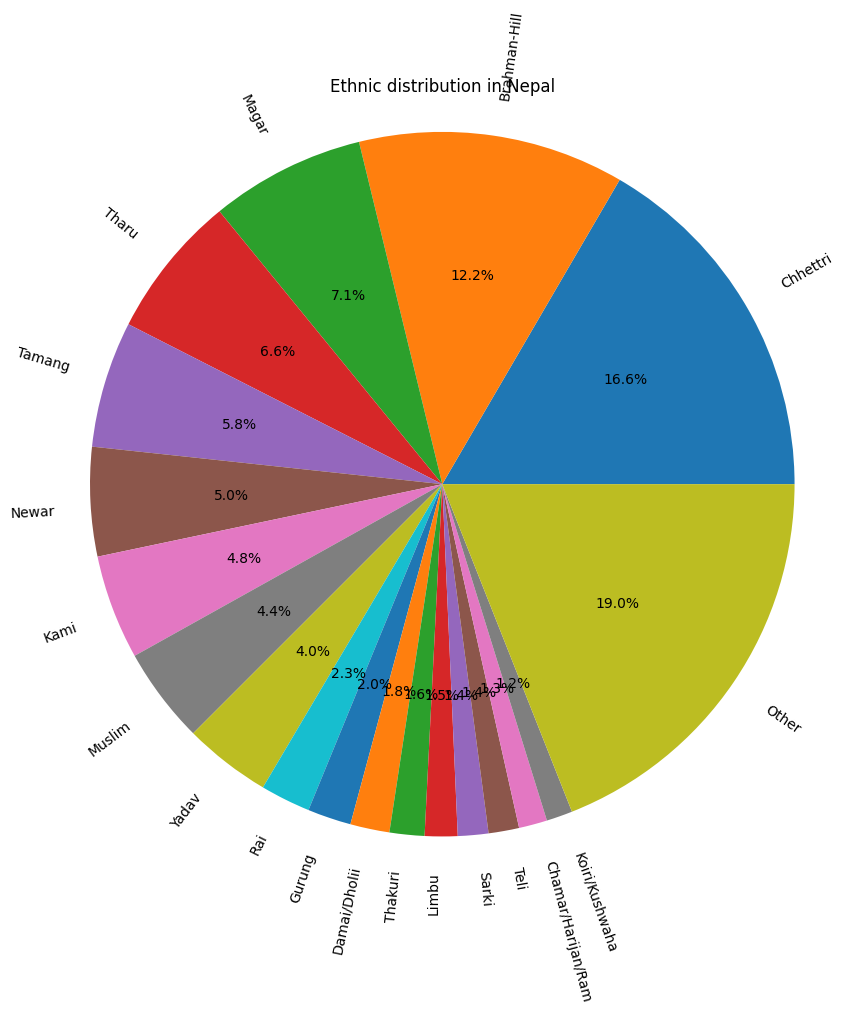

In [81]:
import json
with open('data/nepal-population-ethnic-group.json','r') as file:
    ethnic_dist = json.load(file)

# Data Preparation
labels = ethnic_dist.keys()
sizes = ethnic_dist.values()

# create pie chart
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle = 0, rotatelabels=45)
plt.title('Ethnic distribution in Nepal')
plt.axis('equal')

# display
plt.show()

## Stacked Bar Graph (Homework)

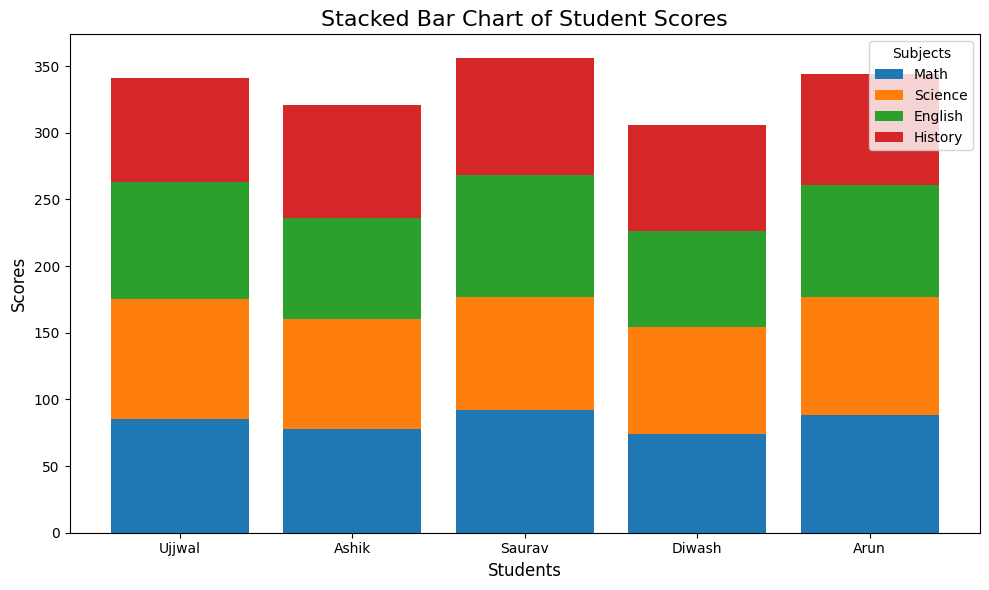

In [86]:
# Load the data from the CSV file
data = pd.read_csv('data/students_scores.csv')

# Prepare data for the stacked bar chart
students = data['Student']
subjects = data.columns[1:]  # Exclude the "Student" column
scores = data[subjects].to_numpy()  # Convert scores to a numpy array

# Define bar positions
x = np.arange(len(students))  # X-axis positions for the students
bar_width = 0.8

# Initialize the bottom position for stacking
bottom_stack = np.zeros(len(students))

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each subject as a stacked layer
for idx, subject in enumerate(subjects):
    plt.bar(x, scores[:, idx], bar_width, bottom=bottom_stack, label=subject)
    bottom_stack += scores[:, idx]  # Update the bottom stack for the next subject

# Add chart labels and title
plt.xlabel('Students', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Stacked Bar Chart of Student Scores', fontsize=16)
plt.xticks(x, students, fontsize=10)  # Set x-ticks to student names
plt.legend(title='Subjects', fontsize=10)

# Add a tight layout and show the plot
plt.tight_layout()
plt.show()

## Introduction to Numpy
- Numpy stands for Numerical Python, is an open-source python library that provides support for large, multi-dimensional arrays and matrices.
- It also have a collection of high-level mathematical functions to operate on arrays


## Features of Numpy
 

### Numpy Array Creation
#### from Python List, Tuple

#### Features of NumPy
- A powerful N-dimensional array object
- Sophisticated (broadcasting) functions
- Tools tor integrating C/C++ and Fortran code
- Useful linear algebra, Fourier transform, and random number capabilities

In [ ]:
import numpy as np

np_array = np.array([1,2,3,4,5,6]) # from list
print(np_array)

np_array_tuple= np.array((1,2,3,4,5)) # from tuple
print(np_array_tuple)
print(type(np_array))
print(np_array.dtype)



[1 2 3 4 5 6]
[1 2 3 4 5]
<class 'numpy.ndarray'>
int64


## Create array with default values
- Create an array filled with zeroes ``np.zeros( (2,2))``
- Create an array filled with ones ``np.ones((2,2))``
- Create an array filled with specific ``np.full((2,2),5)``

In [ ]:
zeros_array = np.zeros( (2,2))
print(zeros_array)

ones_array = np.ones((2,2))
print(ones_array)

specific_array = np.full((2,2),5)
print(specific_array)


[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[5 5]
 [5 5]]


## Creating Arrays with Ranges of values
- ``np.arange(0,25,5)`` # [0,5,10,15,20] similar to range 
- `` np.linspace(0,100,1000)`` create evenly spaced valued (1000) between start(0) to end(100)


In [ ]:
np_arange = np.arange(0,25,1) # similar to range (0,25)
print(np_arange)

np_linespace = np.linspace(0,100,1000) # create evenly spaced 100 points from 0-100
print(np_linespace)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.           0.1001001    0.2002002    0.3003003    0.4004004
   0.5005005    0.6006006    0.7007007    0.8008008    0.9009009
   1.001001     1.1011011    1.2012012    1.3013013    1.4014014
   1.5015015    1.6016016    1.7017017    1.8018018    1.9019019
   2.002002     2.1021021    2.2022022    2.3023023    2.4024024
   2.5025025    2.6026026    2.7027027    2.8028028    2.9029029
   3.003003     3.1031031    3.2032032    3.3033033    3.4034034
   3.5035035    3.6036036    3.7037037    3.8038038    3.9039039
   4.004004     4.1041041    4.2042042    4.3043043    4.4044044
   4.5045045    4.6046046    4.7047047    4.8048048    4.9049049
   5.00500501   5.10510511   5.20520521   5.30530531   5.40540541
   5.50550551   5.60560561   5.70570571   5.80580581   5.90590591
   6.00600601   6.10610611   6.20620621   6.30630631   6.40640641
   6.50650651   6.60660661   6.70670671   6.80680681   6.90690691
   7.007

## Identity, Diagonal Matrices

In [ ]:
identical_array = np.eye(3,3)
print(identical_array)

diag_array = np.diag([1,2,3])
print()
print(diag_array)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[1 0 0]
 [0 2 0]
 [0 0 3]]


## Random Arrays
- ``np.random.rand([3,3])`` create 3*3 array filled with random numbers
- ``np.random.rand([3,3])`` "" ,where random m=numbers are fromm a standard normal distribution
- ``np.random.randint(1,100(3,3))`` create 3*3 array of random numbers, where numbers are in between 1-100
- ``np.random.choice([1,2,3,4,5,6,7,8,9,10],size=(3,3))`` create a 3*3 array of random numbers from the list
- ``np.random.normal(mu,sigma,100)`` create random array of elements 100 with mu=mu and sigma=sigma
 

[[0.5619434  0.67053561 0.09148182]
 [0.0719519  0.1860442  0.97589738]
 [0.95567546 0.40089307 0.48501234]]
[[48 44 46]
 [81 87 52]
 [71 16 48]]
[[ 4  1  2]
 [ 4  3  3]
 [10 10 10]]


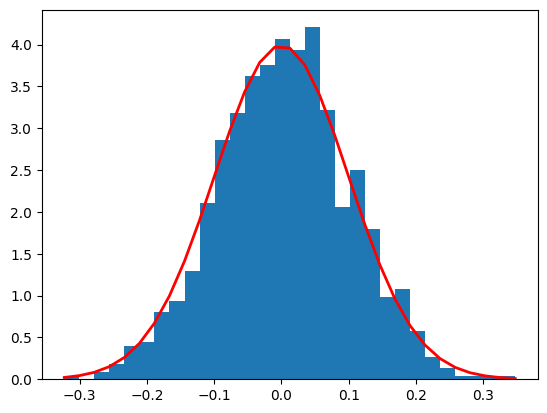

In [ ]:
import matplotlib.pyplot as plt

random_array = np.random.rand(3,3)

print(random_array)

rand_in_betn  = np.random.randint(1,100,(3,3))
print(rand_in_betn)

rand_choice = np.random.choice([1,2,3,4,5,9,10],size = (3,3))
print(rand_choice)

# Draw histogram from normal distribution

mu, sigma = 0, 0.1 # mean and standard deviation

rand_array_normal_dist = np.random.normal(mu,sigma,1000) # normal dist
count,bins,ignored = plt.hist(rand_array_normal_dist, 30, density=True)

plt.plot(bins,1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(bins-mu) ** 2 / (2 * sigma**2)), linewidth = 2, color = 'r')

plt.show()